In [46]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats
import numpy as np
from datetime import timedelta, date
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

In [47]:
def date_convert(x):
    obj=datetime.strptime(x,'%d %b %Y')
    return obj.date()

In [48]:
def emo_data_preprocess(start_date,end_date,df):
    df.date = df.date.apply(lambda x : x[5:16])
    df.date = df.date.apply(lambda x : date_convert(x))
    df=df.groupby('date',as_index=False).mean()
    df=df.reset_index()
    df=df.loc[(df.date>=datetime.strptime(start_date,'%Y-%m-%d').date()) & (df.date<=datetime.strptime(end_date,'%Y-%m-%d').date())]
    #print(df.date.unique())
    return (df)
    
    
    
    

In [49]:
def date_convert_covid(x):
    obj=datetime.strptime(x,'%Y-%m-%d')
    return obj.date()

In [50]:
def covid_data_preprocess(df):
    df.date = df.date.apply(lambda x : date_convert_covid(x))
    return(df)
    
    
    
    
    
    
    
    
    
    

In [51]:
## Checking if the covid cases are influenced by the 

## Correlation Analysis ##

In [52]:
def data_merge(emo_data,covid_data,lag):
    lst=[]
    for k in range(0,len(emo_data)):
        #print(k,emo_data.date[k])
        end_date=emo_data.date[k]+timedelta(days=lag)
        #print(end_date)
        if end_date in covid_data.date.unique():
            cc=covid_data.newCasesBySpecimenDate[covid_data.date==end_date]
            #print(cc.iloc[0])
            lst.append([emo_data.date[k],emo_data.avgLexVal[k],cc.iloc[0]])
    return (lst)
    
    

In [53]:
def plot_data(df,lag,emotion):
    fig, ax1 = plt.subplots()
    #ax2=ax1.twinx()
    ax1.set_ylim(0,0.2)
    ax1.plot(df.cc_after_lag,df.avgLexVal,color='green')
    
    ax1.set_ylabel('{} valence'.format(emotion))
    ax1.set_xlabel('covid_cases after {} days'.format(lag))
    plt.show()

In [54]:
def prep_emo_data(emo,start_date,end_date):
    emo_data=pd.read_csv(r"C:\Users\WELCOME\Downloads\data\emo_dyn\{}.csv".format(emo),index_col=False)
    #print(emo_data.date)
    emo_data_clean=emo_data_preprocess(start_date,end_date,emo_data)
    emo_data_clean.tail(10)
    return (emo_data_clean)

In [55]:
def covid_data_prep():
    covid_data=pd.read_csv(r"C:\Users\WELCOME\downloads\data\covid_data_2021",index_col=False)
    covid_clean=covid_data_preprocess(covid_data)
    return (covid_clean)


In [56]:
emo_combined_data=pd.read_csv(r"C:\Users\WELCOME\Downloads\data\text_emo_data.csv",index_col=False)

In [57]:
emo_combined_data.shape

(7791, 25)

In [58]:
emo_combined_data.date = emo_combined_data.date.apply(lambda x : x[5:16])
emo_combined_data['date']=emo_combined_data['date'].apply(lambda x:date_convert(x))

In [59]:
emo_combined_data.head()

,text,date,link,title,speaker,check_val,polarity,art_len,word_count,pol_tb,...,avgLexVal_anger,avgLexVal_disgust,avgLexVal_fear,avgLexVal_joy,avgLexVal_pos,avgLexVal_neg,avgLexVal_sad,avgLexVal_sur,overall_emo,overall_pol
0,New COVID variant grow rapidly England Andrew ...,2020-12-31,https://www.imperial.ac.uk/news/211793/new-cov...,New COVID-19 variant growing rapidly in Englan...,UK,False,0.094128,4634,611,positive,...,0.016234,0.012987,0.077922,0.025974,0.185065,0.087662,0.032468,0.016234,avgLexVal_trust,avgLexVal_pos
1,Cookies GOVUK We use essential cooky make webs...,2020-12-31,https://www.gov.uk/guidance/if-you-need-to-sel...,[Withdrawn] If you need to self-isolate or can...,UK,False,0.024607,5227,708,positive,...,0.055138,0.052632,0.087719,0.040100,0.192982,0.145363,0.120301,0.045113,avgLexVal_trust,avgLexVal_pos
2,Covid Nailbiting week ahead NHS hospital Engla...,2021-01-01,https://www.bbc.com/news/uk-55505722,"Covid: 'Nail-biting' weeks ahead for NHS, hosp...",UK,False,0.100675,5359,792,positive,...,0.049327,0.017937,0.107623,0.017937,0.147982,0.123318,0.067265,0.035874,avgLexVal_trust,avgLexVal_pos
3,Hospitals across UK must prepare Covid surge s...,2021-01-02,https://www.bbc.co.uk/news/uk-55514363,Hospitals across UK 'must prepare for Covid su...,UK,False,0.098411,3513,541,positive,...,0.061818,0.029091,0.170909,0.021818,0.178182,0.156364,0.127273,0.054545,avgLexVal_fear,avgLexVal_pos
4,Covid Scotland New strain virus accelerate spr...,2021-01-01,https://www.bbc.com/news/uk-scotland-55508141,Covid in Scotland: New strain of virus 'accele...,UK,False,0.114066,2925,445,positive,...,0.063025,0.016807,0.151261,0.025210,0.142857,0.184874,0.079832,0.025210,avgLexVal_fear,avgLexVal_neg


In [60]:
def get_sig_corr():
    sig_cor=[]
    emo_list=['Anger','Anticipation','Disgust','Fear','Joy','Negative','Positive','Sadness','Surprise','Trust']
    for j in emo_list:
        emo_data=prep_emo_data(j,'2020-12-31','2021-12-14')
    #print(emo_data.head())
        covid_data=covid_data_prep()
    #print(covid_data.head())
        for i in range(0,15):
            lst=data_merge(emo_data,covid_data,i)
            cols=['date','avgLexVal','cc_after_lag']
            shift_data=pd.DataFrame(lst,columns=cols)
            
            
            corr,p_val=scipy.stats.pearsonr(shift_data.avgLexVal,shift_data.cc_after_lag)
            if (p_val<0.05):
                sig_cor.append([i,j,corr,p_val])
                #plot_data(shift_data,i,j)
    return(sig_cor)
            
    
    
    


In [61]:
sig_cor_data=get_sig_corr()


In [62]:
sig_cor_data=pd.DataFrame(sig_cor_data)
sig_cor_data.columns=['lag','emotion','corr','p_value']

In [63]:
sig_cor_data.head()

,lag,emotion,corr,p_value
0,1,Anger,0.107743,0.044278
1,2,Anger,0.129404,0.015565
2,0,Disgust,-0.128580,0.016396
3,1,Disgust,-0.129604,0.015404
4,2,Disgust,-0.113802,0.033563


In [64]:
sig_cor_data.shape

(80, 4)

In [65]:
sig_cor_data.emotion.unique()

array(['Anger', 'Disgust', 'Fear', 'Joy', 'Negative', 'Positive',
       'Sadness', 'Trust'], dtype=object)

In [66]:
sig_cor_data.lag.unique()

array([ 1,  2,  0,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [67]:
value,counts=np.unique(sig_cor_data.lag,return_counts=True)
for i in range(len(counts)):
    print(str(value[i])+" days"+" "+str(counts[i])+ " freq")

0 days 5 freq
1 days 7 freq
2 days 7 freq
3 days 6 freq
4 days 6 freq
5 days 6 freq
6 days 5 freq
7 days 4 freq
8 days 4 freq
9 days 5 freq
10 days 5 freq
11 days 5 freq
12 days 5 freq
13 days 6 freq
14 days 4 freq


In [68]:
value,counts=np.unique(sig_cor_data.emotion,return_counts=True)
for i in range(len(counts)):
    print(str(value[i])+" "+str(counts[i])+ " freq")

Anger 2 freq
Disgust 15 freq
Fear 15 freq
Joy 15 freq
Negative 12 freq
Positive 15 freq
Sadness 5 freq
Trust 1 freq


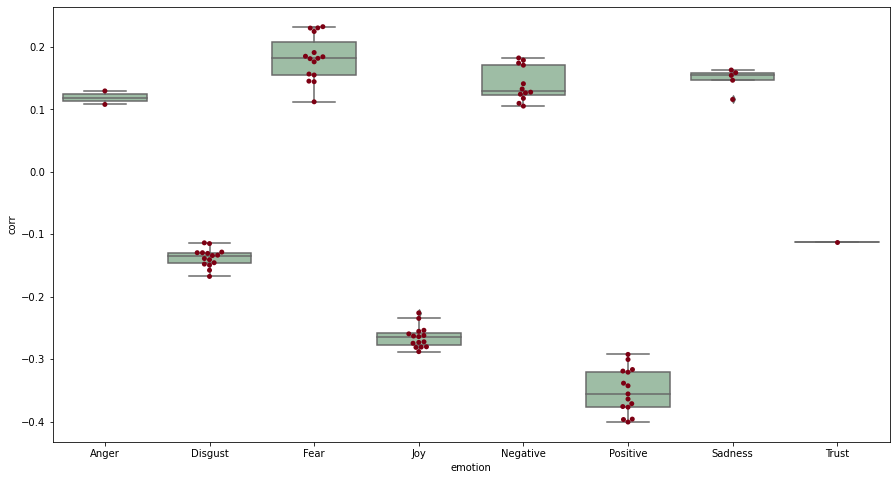

In [69]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='emotion', y='corr', data=sig_cor_data, color='#99c2a2')
ax = sns.swarmplot(x='emotion', y='corr', data=sig_cor_data, color='#7d0013')
plt.show()

## KDE is plotted to check if the distribution of correlation column is normal (pre-requisite for ANOVA test)

<AxesSubplot:ylabel='Density'>

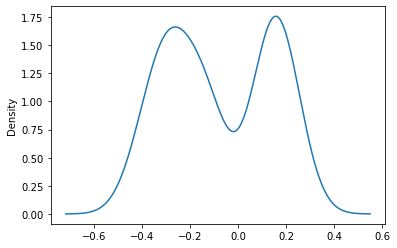

In [70]:
sig_cor_data['corr'].plot.kde()

In [71]:
sig_cor_data[sig_cor_data['corr']==0]

,lag,emotion,corr,p_value


<AxesSubplot:ylabel='Density'>

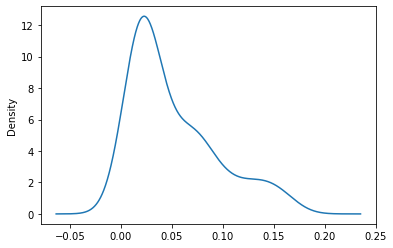

In [72]:
(sig_cor_data['corr']*sig_cor_data['corr']).plot.kde()

In [73]:
#The above plot seems quite normal, hence the test should be valid for the square value of correlation

In [74]:

sig_cor_data['corr_sq']=sig_cor_data['corr']*sig_cor_data['corr']
sig_cor_data.head()

,lag,emotion,corr,p_value,corr_sq
0,1,Anger,0.107743,0.044278,0.011609
1,2,Anger,0.129404,0.015565,0.016745
2,0,Disgust,-0.128580,0.016396,0.016533
3,1,Disgust,-0.129604,0.015404,0.016797
4,2,Disgust,-0.113802,0.033563,0.012951


In [75]:
model = ols('(corr_sq) ~ C(emotion)', data=sig_cor_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(emotion),0.125560,7.0,97.409865,3.944385e-34
Residual,0.013258,72.0,NaN,NaN


In [76]:
value,counts=np.unique(sig_cor_data.lag,return_counts=True)
for i in range(len(counts)):
    print(str(value[i])+" days"+" "+str(counts[i])+ " freq")

0 days 5 freq
1 days 7 freq
2 days 7 freq
3 days 6 freq
4 days 6 freq
5 days 6 freq
6 days 5 freq
7 days 4 freq
8 days 4 freq
9 days 5 freq
10 days 5 freq
11 days 5 freq
12 days 5 freq
13 days 6 freq
14 days 4 freq


In [82]:
model = ols('(corr_sq) ~ C(lag)', data=sig_cor_data).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(lag),0.004487,14.0,0.155095,0.99979
Residual,0.134331,65.0,NaN,NaN


In [77]:
value,counts=np.unique(sig_cor_data.emotion,return_counts=True)
for i in range(len(counts)):
    print(str(value[i])+" days"+" "+str(counts[i])+ " freq")

Anger days 2 freq
Disgust days 15 freq
Fear days 15 freq
Joy days 15 freq
Negative days 12 freq
Positive days 15 freq
Sadness days 5 freq
Trust days 1 freq


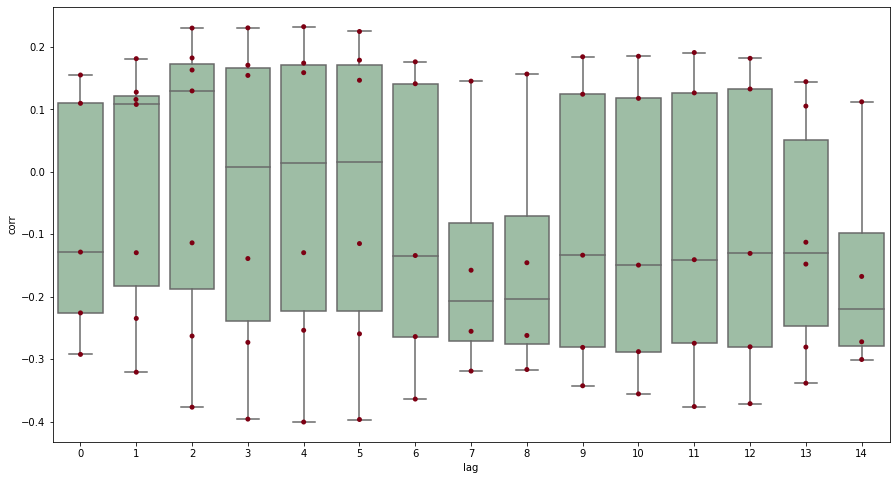

In [78]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='lag', y='corr', data=sig_cor_data, color='#99c2a2')
ax = sns.swarmplot(x='lag', y='corr', data=sig_cor_data, color='#7d0013')
plt.show()

In [79]:
np.std(sig_cor_data['lag'])

4.363753401602799

The lag is an ordinal variable, hence for the hypothesis test, spearman test is done

In [80]:
corr,p_val=scipy.stats.spearmanr(sig_cor_data['corr'],sig_cor_data['lag'])
print(corr,p_val)

-0.17065567617311833 0.1301542791432275


In [81]:
sig_cor_data.to_csv(r"C:\Users\WELCOME\Downloads\data\correlation.csv",index=False)